In [172]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import sys
from pathlib import Path
from classes.microgrid import MicroGrid

# Load data

In [173]:
# Load file paths
load_path = "data/data_QL25_Challenge_3_load.csv"
pv_path = "data/data_QL25_Challenge_3_price_pvgen.csv"

# Read the CSVs
load_df = pd.read_csv(load_path)
pv_and_price_df = pd.read_csv(pv_path)

# Normalize column names
load_df.columns = load_df.columns.str.strip().str.lower()
pv_and_price_df.columns = pv_and_price_df.columns.str.strip().str.lower()

# Rename _time or similar to 'time'
for df in [load_df, pv_and_price_df]:
    for col in df.columns:
        if "time" in col:
            df.rename(columns={col: "time"}, inplace=True)

# Parse datetime
load_df["time"] = pd.to_datetime(load_df["time"]) + pd.Timedelta(days=7)
pv_and_price_df["time"] = pd.to_datetime(pv_and_price_df["time"])
merged_df = pd.merge(load_df, pv_and_price_df, on="time", how="inner")

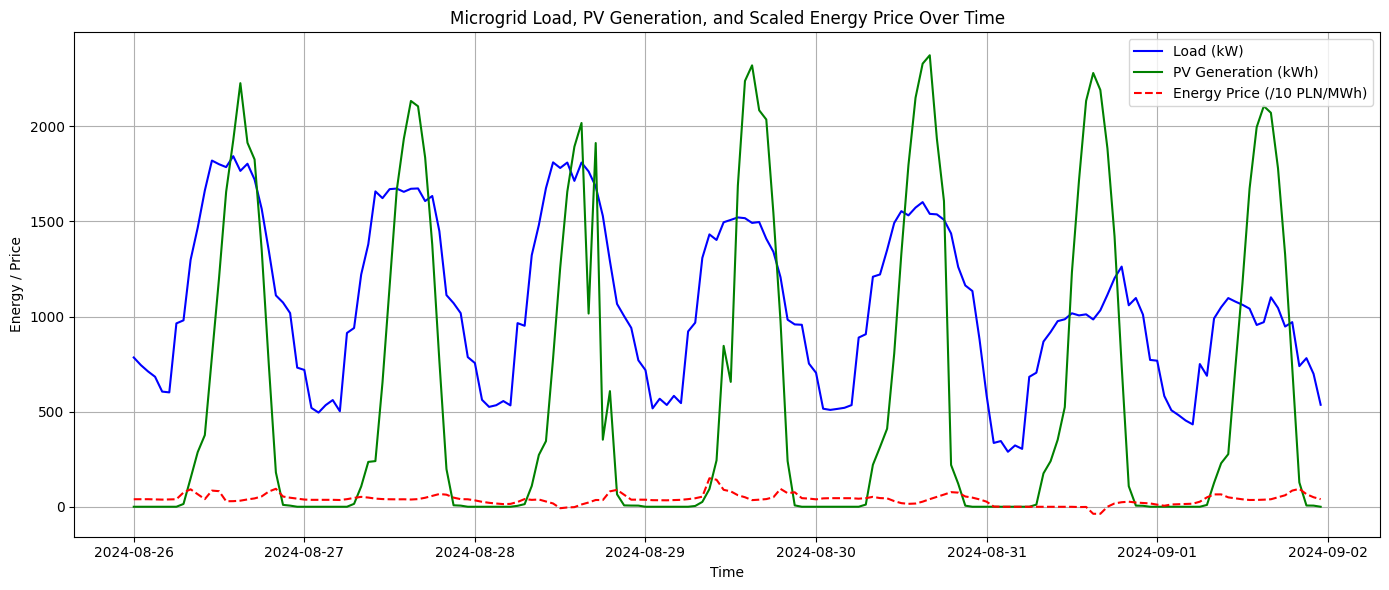

In [174]:
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(14, 6))

# Plot load
plt.plot(merged_df["time"], merged_df["load (kw)"], label="Load (kW)", color='blue')

# Plot PV generation
plt.plot(merged_df["time"], merged_df["pv_3mw_generation (kwh)"], label="PV Generation (kWh)", color='green')

# Plot energy price (scaled to fit visually)
price_scaled = merged_df["energy price (pln/mwh)"] / 10  # adjust for visibility
plt.plot(merged_df["time"], price_scaled, label="Energy Price (/10 PLN/MWh)", color='red', linestyle='--')

# Labels and legend
plt.title("Microgrid Load, PV Generation, and Scaled Energy Price Over Time")
plt.xlabel("Time")
plt.ylabel("Energy / Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


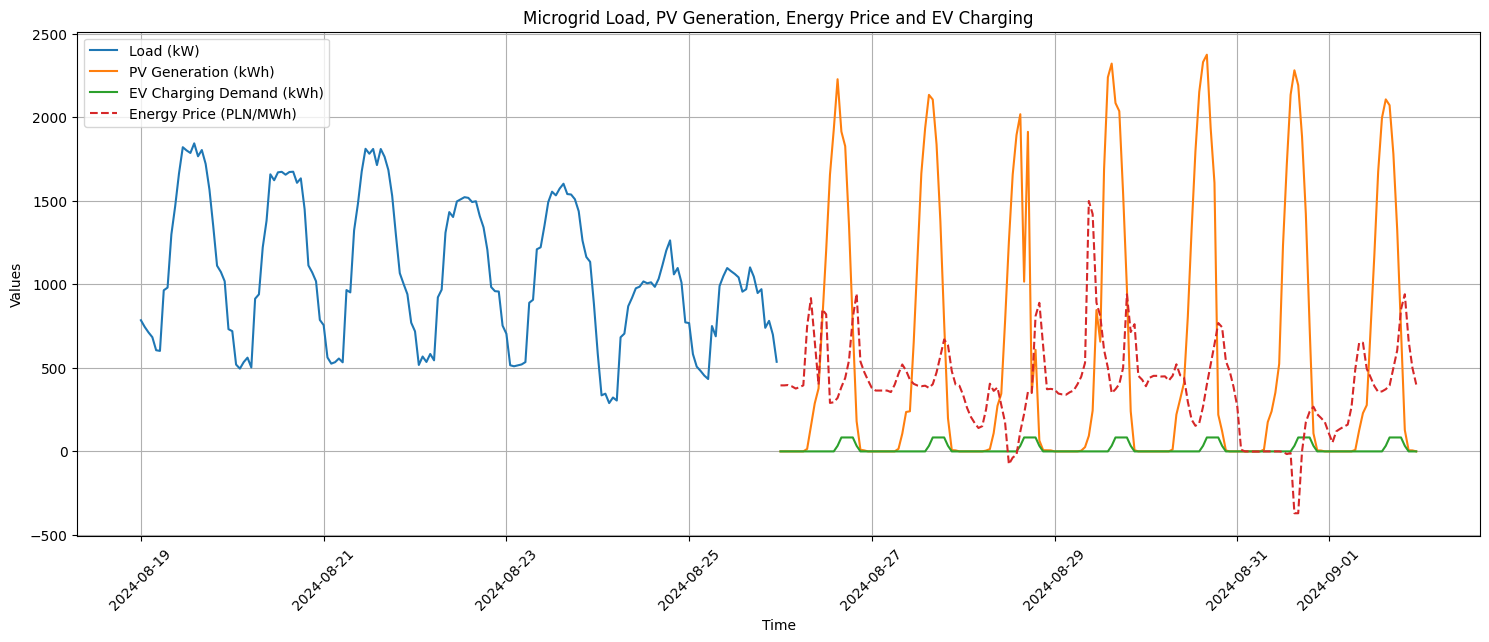

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# Load file paths
load_path = "data/data_QL25_Challenge_3_load.csv"
pv_path = "data/data_QL25_Challenge_3_price_pvgen.csv"
ev_path = "data/ev_charging_schedule.csv"  # Dodany plik EV

# Read the CSVs
load_df = pd.read_csv(load_path)
pv_and_price_df = pd.read_csv(pv_path)
ev_df = pd.read_csv(ev_path)

# Normalize column names
load_df.columns = load_df.columns.str.strip().str.lower()
pv_and_price_df.columns = pv_and_price_df.columns.str.strip().str.lower()
ev_df.columns = ev_df.columns.str.strip().str.lower()

# Rename any 'time'-like column to 'time'
for df in [load_df, pv_and_price_df, ev_df]:
    for col in df.columns:
        if "time" in col:
            df.rename(columns={col: "time"}, inplace=True)

# Parse datetime
load_df["time"] = pd.to_datetime(load_df["time"])
pv_and_price_df["time"] = pd.to_datetime(pv_and_price_df["time"])
ev_df["time"] = pd.to_datetime(ev_df["time"])

# Merge datasets
merged_df = pd.merge(load_df, pv_and_price_df, on="time", how="outer")
merged_df = pd.merge(merged_df, ev_df, on="time", how="outer").sort_values("time")

# Plot
plt.figure(figsize=(15, 6))
plt.plot(merged_df["time"], merged_df["load (kw)"], label="Load (kW)")
plt.plot(merged_df["time"], merged_df["pv_3mw_generation (kwh)"], label="PV Generation (kWh)")
plt.plot(merged_df["time"], merged_df["ev_demand_kwh"], label="EV Charging Demand (kWh)")
plt.plot(merged_df["time"], merged_df["energy price (pln/mwh)"], label="Energy Price (PLN/MWh)", linestyle='--')

plt.title("Microgrid Load, PV Generation, Energy Price and EV Charging")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


# Optimalization

In [180]:
display(load_df)

,time,load (kw)
0,2024-08-19 00:00:00+02:00,784.652053
1,2024-08-19 01:00:00+02:00,744.659033
2,2024-08-19 02:00:00+02:00,711.664783
3,2024-08-19 03:00:00+02:00,683.285406
4,2024-08-19 04:00:00+02:00,605.304298
...,...,...
163,2024-08-25 19:00:00+02:00,970.434549
164,2024-08-25 20:00:00+02:00,739.320280
165,2024-08-25 21:00:00+02:00,780.998870
166,2024-08-25 22:00:00+02:00,698.696249


In [181]:
display(pv_and_price_df)

,time,energy price (pln/mwh),pv_3mw_generation (kwh)
0,2024-08-26 00:00:00+02:00,395,0.000000
1,2024-08-26 01:00:00+02:00,395,0.000000
2,2024-08-26 02:00:00+02:00,397,0.000000
3,2024-08-26 03:00:00+02:00,389,0.000000
4,2024-08-26 04:00:00+02:00,376,0.000000
...,...,...,...
163,2024-09-01 19:00:00+02:00,850,732.599991
164,2024-09-01 20:00:00+02:00,940,127.800007
165,2024-09-01 21:00:00+02:00,662,6.600000
166,2024-09-01 22:00:00+02:00,500,6.000000


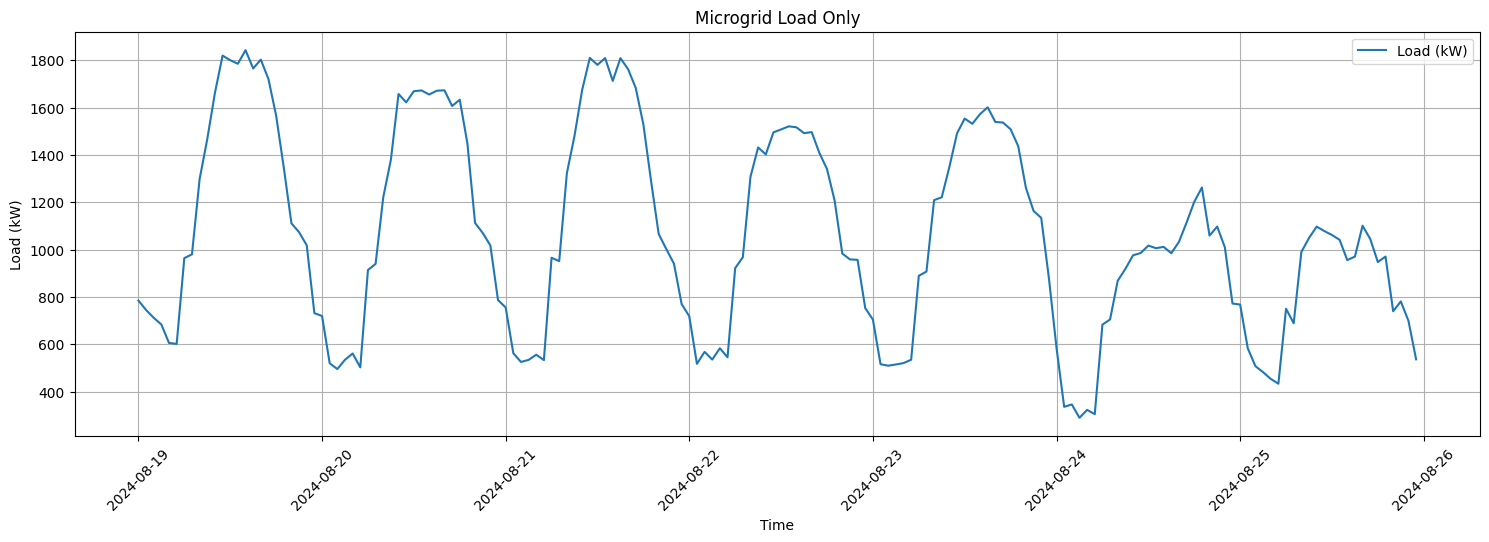

In [206]:
# Plot only the load
plt.figure(figsize=(15, 5))
plt.plot(merged_df["time"], merged_df["load (kw)"], label="Load (kW)", color='tab:blue')

plt.title("Microgrid Load Only")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


# Costs without PV

In [208]:
import pandas as pd

# === Load datasets ===
load_df = pd.read_csv("data/data_QL25_Challenge_3_load.csv")
price_df = pd.read_csv("data/data_QL25_Challenge_3_price_pvgen.csv")
ev_df = pd.read_csv("data/ev_charging_schedule.csv")

# === Normalize and clean column names ===
for df in [load_df, price_df, ev_df]:
    df.columns = df.columns.str.strip().str.lower()
    for col in df.columns:
        if "time" in col:
            df.rename(columns={col: "time"}, inplace=True)

# Convert time columns to datetime
load_df["time"] = pd.to_datetime(load_df["time"])
price_df["time"] = pd.to_datetime(price_df["time"])
ev_df["time"] = pd.to_datetime(ev_df["time"])

# === Shift load data by +7 days to align with forecast week ===
load_df["time"] = load_df["time"] + pd.Timedelta(days=7)

# === Merge datasets on time ===
df = pd.merge(load_df, price_df, on="time", how="inner")
df = pd.merge(df, ev_df, on="time", how="left")
df["ev_demand_kwh"] = df["ev_demand_kwh"].fillna(0)

# === Add EV demand to base load ===
df["total_demand_kwh"] = df["load (kw)"] + df["ev_demand_kwh"]

# === Convert price from PLN/MWh to PLN/kWh ===
df["price_pln_kwh"] = df["energy price (pln/mwh)"] / 1000

# === Calculate cost and CO2 emissions (no PV) ===
df["cost_pln"] = df["total_demand_kwh"] * df["price_pln_kwh"]
df["co2_kg"] = (df["total_demand_kwh"] / 1000) * 597  # 597 kg/MWh

# === Final results ===
total_cost = df["cost_pln"].sum()
total_co2 = df["co2_kg"].sum()

print(f"💰 Total cost (no PV): {total_cost:.2f} PLN")
print(f"🌍 Total CO₂ emissions (no PV): {total_co2:.2f} kg")


💰 Total cost (no PV): 75793.00 PLN
🌍 Total CO₂ emissions (no PV): 108907.41 kg


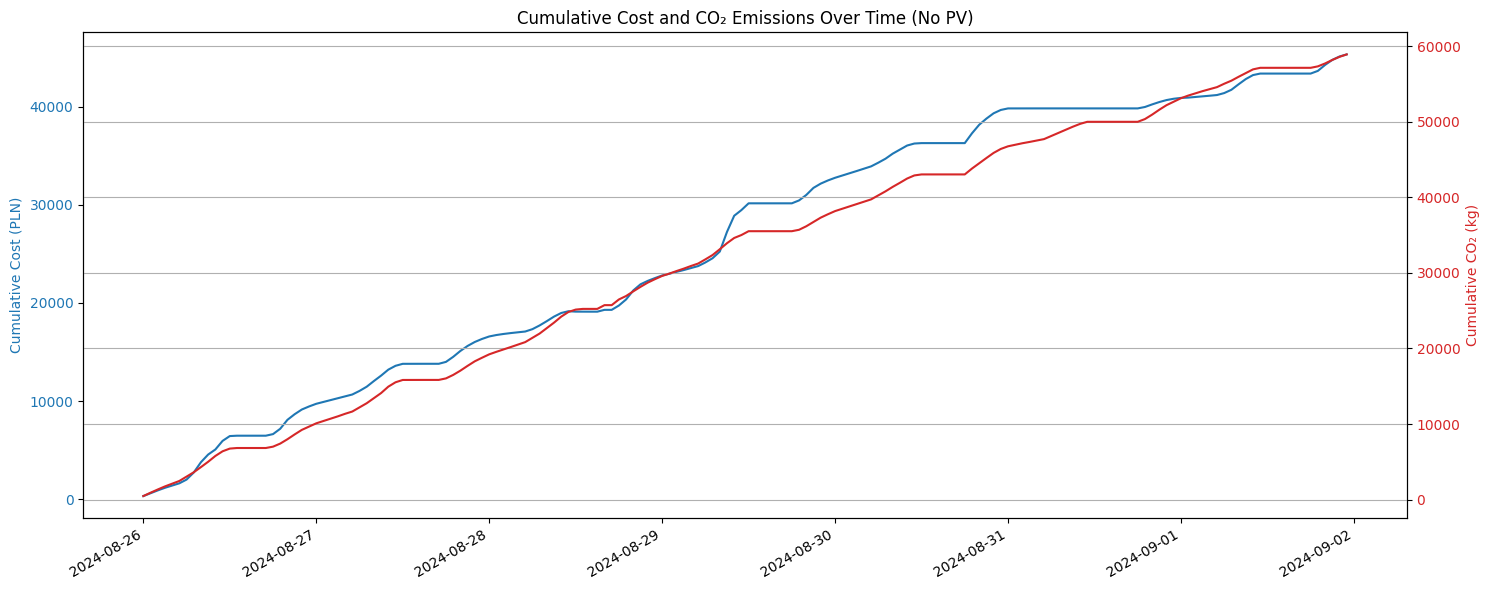

In [214]:
import matplotlib.pyplot as plt

# Calculate cumulative cost and CO₂ over time
df["cumulative_cost_pln"] = df["cost_pln"].cumsum()
df["cumulative_co2_kg"] = df["co2_kg"].cumsum()

# Create plot
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot cumulative cost
ax1.plot(df["time"], df["cumulative_cost_pln"], label="Cumulative Cost (PLN)", color='tab:blue')
ax1.set_ylabel("Cumulative Cost (PLN)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for CO2
ax2 = ax1.twinx()
ax2.plot(df["time"], df["cumulative_co2_kg"], label="Cumulative CO₂ (kg)", color='tab:red')
ax2.set_ylabel("Cumulative CO₂ (kg)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and formatting
plt.title("Cumulative Cost and CO₂ Emissions Over Time (No PV)")
fig.autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()


# Cost with PV but not optimaized

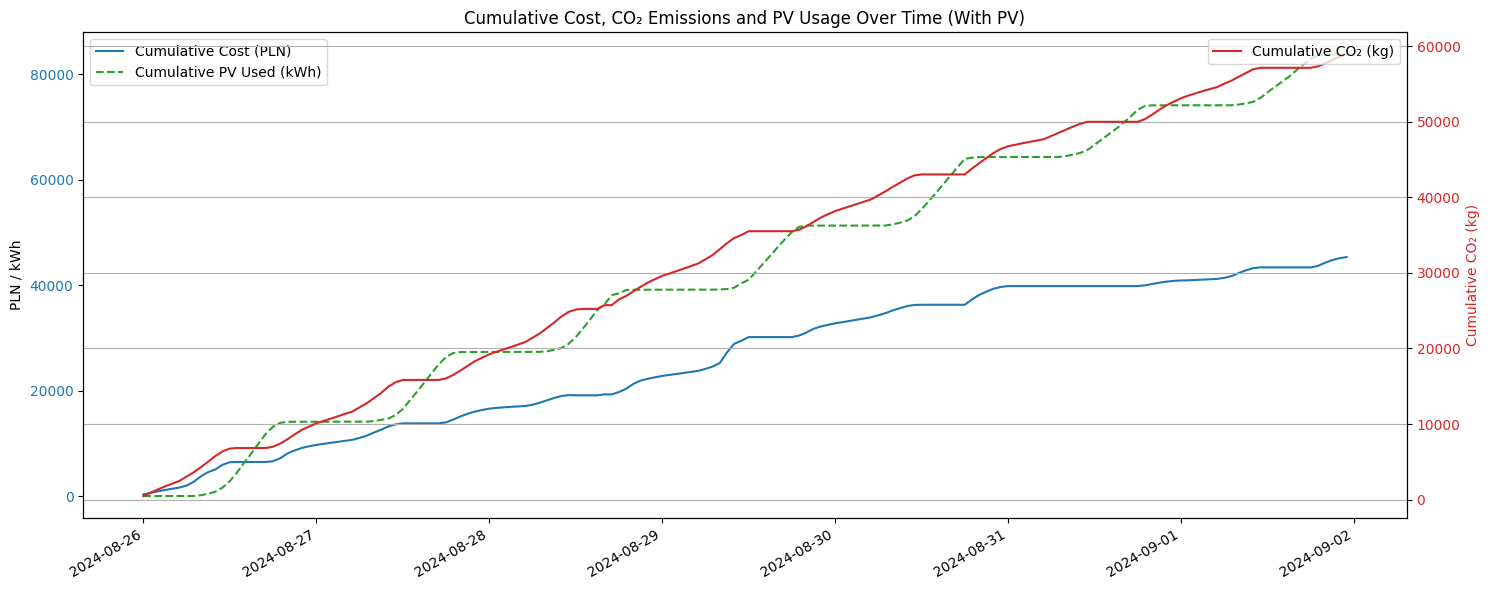

In [215]:
import matplotlib.pyplot as plt

# Recalculate PV used
df["pv_used_kwh"] = df[["pv_3mw_generation (kwh)", "total_demand_kwh"]].min(axis=1)
df["cumulative_pv_used_kwh"] = df["pv_used_kwh"].cumsum()

# Plot cumulative values
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot cumulative cost
ax1.plot(df["time"], df["cumulative_cost_pln"], label="Cumulative Cost (PLN)", color='tab:blue')
ax1.plot(df["time"], df["cumulative_pv_used_kwh"], label="Cumulative PV Used (kWh)", color='tab:green', linestyle='--')
ax1.set_ylabel("PLN / kWh")
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Second y-axis for CO2
ax2 = ax1.twinx()
ax2.plot(df["time"], df["cumulative_co2_kg"], label="Cumulative CO₂ (kg)", color='tab:red')
ax2.set_ylabel("Cumulative CO₂ (kg)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Formatting
plt.title("Cumulative Cost, CO₂ Emissions and PV Usage Over Time (With PV)")
fig.autofmt_xdate()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()
